<a href="https://colab.research.google.com/github/AmakaDBI/ML_Projects/blob/master/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the onset of diabetes using MLP


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
#load the dataset
data=pd.read_csv('/content/pima-indians-diabetes.csv')

Exploratory Data Analysis


In [4]:
#Take a look at the portion of the dataset
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
#Rename the columns
column_names=['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI',
              'DiabetesPedigreeFunction','Age','Outcome']
data.columns=column_names

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
data.shape #check the size of the dataset

(767, 9)

In [8]:
data.isnull().any()#check for missing values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
#summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd66e5778d0>,
      dtype=object)

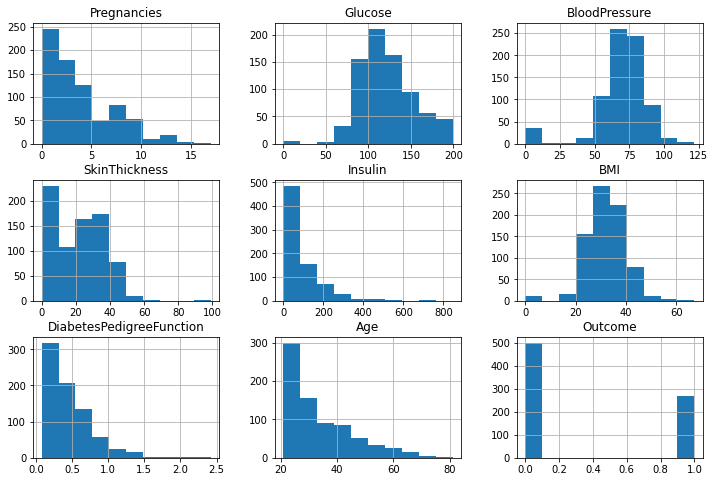

In [10]:
data.hist(figsize=(12,8))

In [11]:
#data contains 0 values which are inappropriate for some of the variables

Data preprocessing



In [12]:
#check how many 0s in each columns

for col in data.columns:
  missing_row=data.loc[data[col]==0].shape[0]
 
  print(f"{col} : {missing_row}")

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 373
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [13]:
missing_cols=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in missing_cols:
  data[col]=data[col].replace(0, np.nan)
  data[col]=data[col].fillna(data[col].mean())
  


In [14]:

for col in data.columns:
  missing_row=data.loc[data[col]==0].shape[0]
 
  print(f"{col} : {missing_row}")
 #check to be sure that their are no 0 values again
#the pregnancy column was not affected as 0 pregnancies seems appropriate

Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [15]:
#The features and target
X=data.drop('Outcome', axis=1)
y=data['Outcome']
X.shape

(767, 8)

In [21]:
#scale the data, the target data (i.e outcome) need not be scaled
X=preprocessing.scale(X)
new_names=['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI',
              'DiabetesPedigreeFunction','Age']
X=pd.DataFrame(X, columns=new_names)

In [22]:
print(data.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  ...    Age  Outcome
mean         3.84   121.65  ...  33.22     0.35
std          3.37    30.44  ...  11.75     0.48
max         17.00   199.00  ...  81.00     1.00

[3 rows x 9 columns]


In [23]:
print(X.describe().loc[['mean', 'std','max'],].round(2).abs()) #each variable now has 0 mean and unit variance

      Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction   Age
mean         0.00     0.00            0.0  ...  0.00                      0.00  0.00
std          1.00     1.00            1.0  ...  1.00                      1.00  1.00
max          3.91     2.54            4.1  ...  5.04                      5.88  4.07

[3 rows x 8 columns]


In [24]:
#split the data into training, testing and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train, test_size=0.2)

Building the model


In [35]:
#import the libraries for neural network
from keras.models import  Sequential
from keras.layers import Dense
from keras import optimizers

In [36]:
model=Sequential()
#add the first layer
model.add(Dense(units=32, activation='relu', input_dim=X.shape[1]))
#add the second hidden layer
model.add(Dense(16, activation='relu'))

In [37]:
#The output layer
model.add(Dense(1, activation='sigmoid'))

Model compilation


In [38]:
#To train the model, define the parameters of the training method
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
#train the model for 200 epochs (iteration)
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6633
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7143
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7367
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7347
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7347
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7367
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7408
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7490
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7469
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7490
Epoch 11/

In [43]:
#Model evaluation
training_scores=model.evaluate(X_train, y_train)
testing_scores=model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7857


In [46]:
print(f"Testing Accuracy:{testing_scores[1]*100}")
print(f"Training Accuracy:{training_scores[1]*100}")

Testing Accuracy:78.57142686843872
Training Accuracy:92.44897961616516


In [47]:
#given the eight measurements from a new patient (glucose, blood pressure, insulin, and so on),
# our MLP is able to predict with 78.5% accuracy whether that patient will develop diabetes within the next five years.

In [48]:
#Confusion matrix
from sklearn.metrics import confusion_matrix


In [54]:
y_test_pred=model.predict_classes(X_test)
c_matrix=confusion_matrix(y_test, y_test_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(33.0, 0.5, 'Actual')

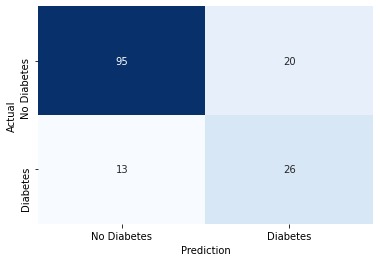

In [55]:
#plot the confusion matrix
ax=sns.heatmap(c_matrix, annot=True,
               xticklabels=['No Diabetes', 'Diabetes'],
               yticklabels=['No Diabetes','Diabetes'],
               cbar=False, cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')


In [57]:
print(c_matrix)

[[95 20]
 [13 26]]


True Negative=95
False Negative=13
True Positive=26
False positive=20
